# 一、数据预处理

## 1.数据总体概览

In [1]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns
'''
我认为有意义的列:
    int:
        price
        powerPS
        kilometer
        car_month(计算得到大概的)
        
    object:
        vehicleType
            limousine 豪华轿车？
            kleinwagen 小型车
            kombi 小客车
            bus
            cabrio 敞篷？
            coupe 双门车
            suv 运动型多功能
            andere 其他
        gearbox
            manuell
            automatik
        model
            
        fuelType
            benzi
            diesel
            lpg
            cng
            hybrid
            andere
            elektro
        brand
            
        notRepairedDamage
            nein
            ja
    
'''
#读入文件
df = pd.read_csv('d:/dataset4/autos.csv', encoding='ISO-8859-1', sep=',')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [3]:
df.shape

(371528, 20)

In [4]:
df.head().append(df.tail())

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


price、year、powerPS最值明显异常

## 2.缺失情况

In [6]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
df.isnull().sum() / df.isnull().count() #这里缺失挺大

dateCrawled            0.000000
name                   0.000000
seller                 0.000000
offerType              0.000000
price                  0.000000
abtest                 0.000000
vehicleType            0.101928
yearOfRegistration     0.000000
gearbox                0.054394
powerPS                0.000000
model                  0.055134
kilometer              0.000000
monthOfRegistration    0.000000
fuelType               0.089861
brand                  0.000000
notRepairedDamage      0.193956
dateCreated            0.000000
nrOfPictures           0.000000
postalCode             0.000000
lastSeen               0.000000
dtype: float64

<AxesSubplot:>

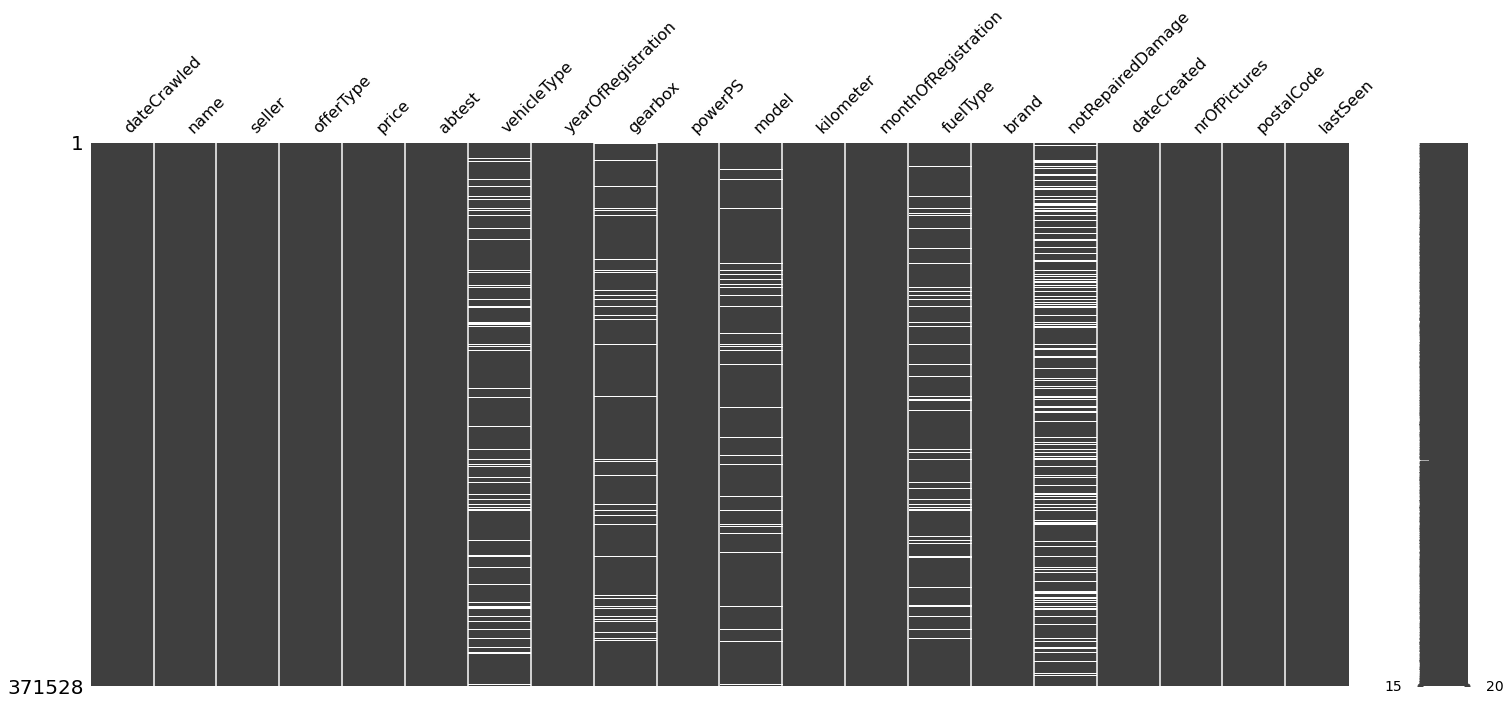

In [8]:
#缺失值分布情况
msno.matrix(df)

## 3.标签分布情况

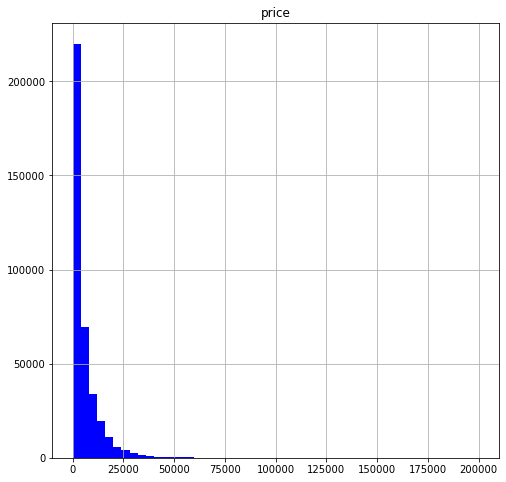

In [9]:
df.hist(column="price",        
              figsize=(8,8),         
              color="blue",          
              bins=50,               
              range= (0,200000));

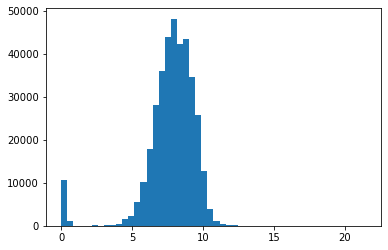

In [10]:
#标签的log变换
plt.hist(np.log(df['price'] + 1), orientation = 'vertical',histtype = 'bar',bins = 50) 
plt.show()

<AxesSubplot:>

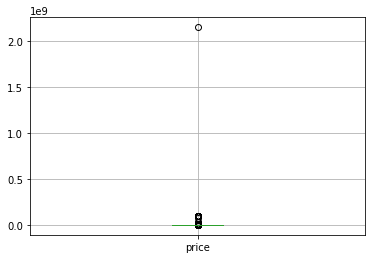

In [11]:
#标签的箱线图
df.boxplot(column="price")

## 4.特征初步分析

### 1）数字特征

#### price

In [12]:
df['price'].value_counts().sort_index(ascending = True).head(20)

0     10778
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
16        2
17        5
18        3
19        3
20       51
Name: price, dtype: int64

In [13]:
df['price'].value_counts().sort_index(ascending = False).head(20)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
Name: price, dtype: int64

In [14]:
df = df[df['price'].between(100,100000)]
#这里直接删除过小和过大值

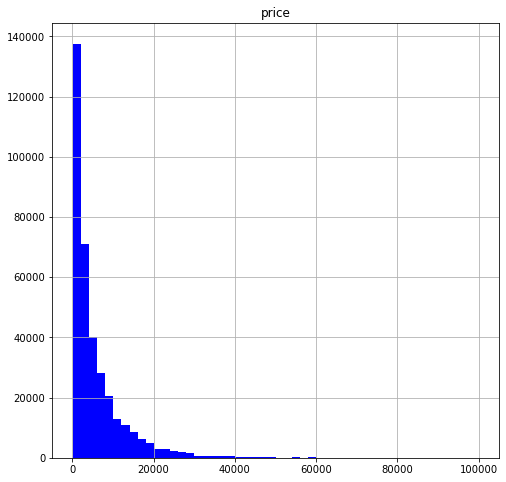

In [15]:
df.hist(column="price",        
              figsize=(8,8),         
              color="blue",          
              bins=50            
              );

C:\Users\26242\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

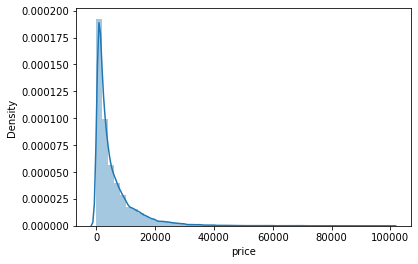

In [16]:
sns.distplot(df['price'])

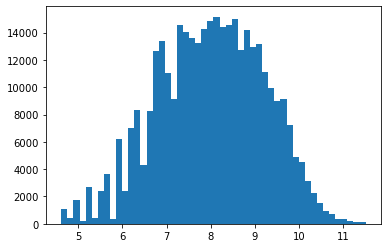

In [17]:
#log变换
plt.hist(np.log(df['price'] + 1), orientation = 'vertical',histtype = 'bar',bins = 50) 
plt.show()

#### powerPS

In [18]:
df['powerPS'].value_counts().sort_index(ascending = True).head(20)

0     35594
1        24
2         9
3         9
4        30
5        99
6        11
7        10
8         7
9         5
10       13
11       28
12       20
13        8
14       21
15       19
16       11
17        8
18       53
19       15
Name: powerPS, dtype: int64

In [19]:
df['powerPS'].value_counts().sort_index(ascending = False).head(20)

20000    1
19312    1
19211    1
19208    1
17932    1
17700    1
17410    1
17322    1
17019    1
17011    1
16312    1
16311    1
16051    1
16011    1
15033    1
15020    1
15017    1
15001    1
14009    1
13636    1
Name: powerPS, dtype: int64

In [20]:
#这里用中位数填充0值
#这是因为 我认为0值或许是网站的默认值,即客户没有填写,当空值处理,但是由于异常值偏离大,所以用中位数填充
df.replace(to_replace = {'powerPS':0}, value = {'powerPS':df['powerPS'].median()}, inplace = True)

#### kilometer

<AxesSubplot:ylabel='Density'>

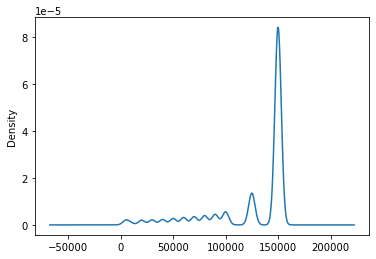

In [21]:
df['kilometer'].plot(kind = 'density')

In [22]:
df['kilometer'].value_counts()

150000    231509
125000     37222
100000     15349
90000      12319
80000      10859
70000       9635
60000       8563
50000       7505
40000       6295
30000       5890
20000       5452
5000        5406
10000       1801
Name: kilometer, dtype: int64

#### postalCode

In [23]:
df['postalCode'].value_counts()

10115    821
65428    626
66333    328
38518    308
44145    307
        ... 
29587      1
89368      1
95356      1
91471      1
31096      1
Name: postalCode, Length: 8146, dtype: int64

#### yearOfRegistration

In [24]:
df['yearOfRegistration'].value_counts().sort_index(ascending = True).head(20)

1000    22
1001     1
1039     1
1111     1
1234     4
1255     1
1300     2
1400     1
1500     3
1600     2
1602     1
1800     4
1910    36
1911     1
1923     3
1925     1
1927     2
1928     2
1929     7
1930     4
Name: yearOfRegistration, dtype: int64

In [25]:
df = df[df['yearOfRegistration'].between(1900,2016)]
#这里直接删除过小和过大值
df.reset_index(drop = True, inplace = True)

#### monthOfRegistration

In [26]:
df[df['monthOfRegistration'] == 0].count()

dateCrawled            28497
name                   28497
seller                 28497
offerType              28497
price                  28497
abtest                 28497
vehicleType            20119
yearOfRegistration     28497
gearbox                22284
powerPS                28497
model                  24129
kilometer              28497
monthOfRegistration    28497
fuelType               19173
brand                  28497
notRepairedDamage      12211
dateCreated            28497
nrOfPictures           28497
postalCode             28497
lastSeen               28497
dtype: int64

<AxesSubplot:>

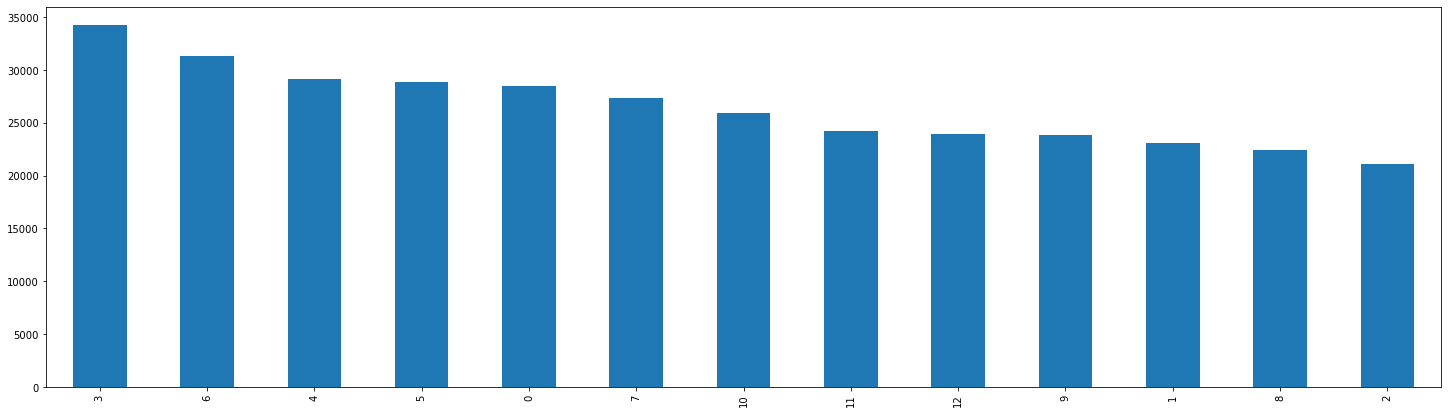

In [27]:
plt.figure(figsize=(25,7))
df['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

### 2)类别特征

In [28]:
categorical_features = ['name','seller','offerType','fuelType','brand','notRepairedDamage','abtest','vehicleType','gearbox','model']

In [29]:
#每个特征有多少种类别
for f in categorical_features:
    print(f,":",df[f].nunique())

name : 211714
seller : 2
offerType : 2
fuelType : 7
brand : 40
notRepairedDamage : 2
abtest : 2
vehicleType : 8
gearbox : 2
model : 251


In [30]:
#每个特征的每个类别有多少个
for c in categorical_features:
    print(c,"的分布情况：")
    print(df[c].value_counts())
    print('--' * 30)

name 的分布情况：
BMW_318i                                                 627
Ford_Fiesta                                              609
Volkswagen_Golf_1.4                                      603
Opel_Corsa                                               594
BMW_316i                                                 523
                                                        ... 
Opel_Meriva_1.6_//_Orig.52_tKM_/_1.Hand_Rentnerfahrzg      1
Bmw_318_ci._Cabrio                                         1
Seat_Leon_2.0_T_FSI_Cupra_R_Xenon_Navi_Garagenfahrzeu      1
Fiat_Punto_SX_mit_LPG_Gasanlage                            1
BMW_M135i_vollausgestattet_NP_52.720____Euro               1
Name: name, Length: 211714, dtype: int64
------------------------------------------------------------
seller 的分布情况：
privat        343931
gewerblich         3
Name: seller, dtype: int64
------------------------------------------------------------
offerType 的分布情况：
Angebot    343928
Gesuch          6
Name: offerType, d

## 预处理的结论：
    1.price,yearOfRegistration偏离较大,删除了两端值
    2.price与数字变量相关性不太高
    3.powerPS异常值偏离大
    4.seller特征与offferType特征内部数据差值很大，没有意义
    5.汽车的注册日期与上线日期可以估计出车龄
    6.postalCode,name类别过多，删除

# 二、数据清洗

## 1.异常值处理-----用箱线图去除异常值

In [31]:
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr   #下边缘
        val_up = data_ser.quantile(0.75) + iqr     #上边缘
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name] #复制数据
    
    rule, value = box_plot_outliers(data_series, box_scale=scale)#得到上下边缘及判定条件
    
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 3214
Now column number is: 340720
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: powerPS, dtype: float64
Description of data larger than the upper bound is:
count     3214.000000
mean       731.413503
std       1702.276795
min        343.000000
25%        360.000000
50%        404.000000
75%        480.750000
max      20000.000000
Name: powerPS, dtype: float64


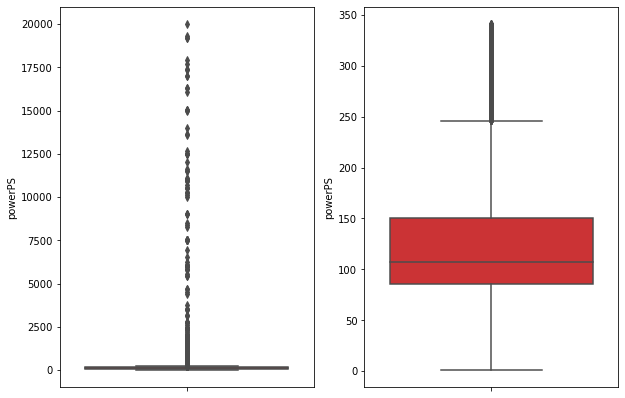

In [32]:
df.reset_index(drop = True, inplace = True)
df = outliers_proc(df, 'powerPS')

## 2.缺失值处理

In [33]:
#暂时上下填充，，，，，，，，缺失值都不是数字特征
df.fillna(method = "ffill", inplace = True)
df.fillna(method = "bfill", inplace = True)

## 3.特征处理

### age

In [34]:
#车龄
tmp_month = []
for i in range(len(df['dateCreated'])):
    if df['yearOfRegistration'][i] and df['dateCreated'][i]:
        year_re = df['yearOfRegistration'][i]
        year_cr = int(df['dateCreated'][i][:4])
        mon_re = df['monthOfRegistration'][i]
        mon_cr = int(df['dateCreated'][i][5:6])
        if year_cr - year_re < 0:
            #tmp += [-1]
            tmp_month += [0]
        
        else:
            #tmp += [year_cr - year_re]  #这里将所有车龄小于0的车龄全暂时赋0
            if year_cr - year_re == 0:
                if mon_cr - mon_re < 0:
                    tmp_month += [0]
                else:
                    tmp_month += [(year_cr - year_re) * 12 + mon_cr - mon_re]
            else:
                tmp_month += [(year_cr - year_re) * 12 + mon_cr - mon_re]
df['car_month'] = tmp_month

#这里用中位数填充0值
df.replace(to_replace = {'car_month':0}, value = {'car_month':df['car_month'].median()}, inplace = True)

### online_days

In [35]:
#日期转换
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [36]:
val = list(df['lastSeen'] - df['dateCreated'])
tmp = [obj.days for obj in val]
for i in range(len(tmp)):
  if tmp[i] < 0:
    tmp[i] = 0
df['online_days'] = tmp

#这里用中位数填充0值
df.replace(to_replace = {'online_days':0}, value = {'online_days':df['online_days'].median()}, inplace = True)

### 删除无用特征

In [37]:
#去掉无意义的特征
df.drop(['dateCrawled'], axis = 1, inplace = True)
df.drop(['yearOfRegistration'], axis = 1, inplace = True)
df.drop(['monthOfRegistration'], axis = 1, inplace = True)
df.drop(['dateCreated'], axis = 1, inplace = True)
df.drop(['lastSeen'], axis = 1, inplace = True)

df.drop(['nrOfPictures'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)
df.drop(['seller'], axis = 1, inplace = True)
df.drop(['offerType'], axis = 1, inplace = True)
df.drop(['postalCode'], axis = 1, inplace = True)


df = df[df['car_month'].between(0,720)]
df = df[df['online_days'].between(0,400)]
df.reset_index(drop = True, inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340490 entries, 0 to 340489
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              340490 non-null  int64 
 1   abtest             340490 non-null  object
 2   vehicleType        340490 non-null  object
 3   gearbox            340490 non-null  object
 4   powerPS            340490 non-null  int64 
 5   model              340490 non-null  object
 6   kilometer          340490 non-null  int64 
 7   fuelType           340490 non-null  object
 8   brand              340490 non-null  object
 9   notRepairedDamage  340490 non-null  object
 10  car_month          340490 non-null  int64 
 11  online_days        340490 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 31.2+ MB


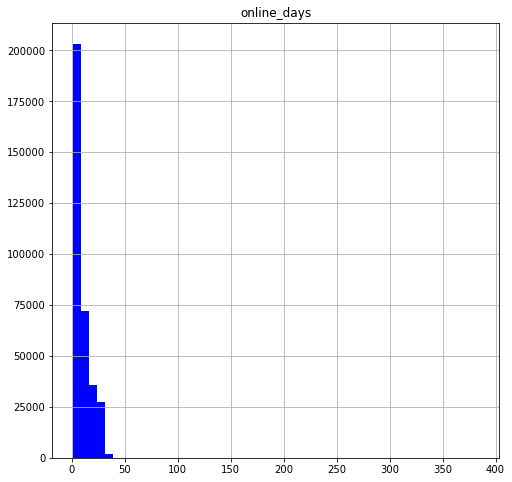

In [39]:
df.hist(column="online_days",        
              figsize=(8,8),         
              color="blue",          
              bins=50);

In [40]:
df['online_days'].value_counts().sort_index().tail(20)

110    1
121    1
122    1
125    1
133    1
135    1
136    1
141    1
144    1
146    1
149    1
150    1
152    1
193    2
209    1
239    1
244    1
292    1
300    1
384    1
Name: online_days, dtype: int64

In [41]:
df.to_csv('car_data.csv', index = 0)

In [42]:
df

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,car_month,online_days
0,480,test,coupe,manuell,107,golf,150000,benzin,volkswagen,ja,276,14
1,18300,test,coupe,manuell,190,golf,125000,diesel,audi,ja,55,14
2,9800,test,suv,automatik,163,grand,125000,diesel,jeep,ja,136,22
3,1500,test,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,174,6
4,3600,test,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,89,6
...,...,...,...,...,...,...,...,...,...,...,...,...
340485,2200,test,bus,manuell,107,zafira,20000,benzin,sonstige_autos,nein,131,23
340486,1199,test,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,189,6
340487,9200,test,bus,manuell,102,transporter,150000,diesel,volkswagen,nein,237,19
340488,3400,test,kombi,manuell,100,golf,150000,diesel,volkswagen,nein,162,4


In [43]:
#处理分类变量
tmp = pd.get_dummies(df, columns = ['gearbox', 'abtest', 'notRepairedDamage', 'fuelType', 'model', 'vehicleType','brand'])
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340490 entries, 0 to 340489
Columns: 317 entries, price to brand_volvo
dtypes: int64(5), uint8(312)
memory usage: 114.3 MB


In [44]:
tmp

,price,powerPS,kilometer,car_month,online_days,gearbox_automatik,gearbox_manuell,abtest_control,abtest_test,notRepairedDamage_ja,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,480,107,150000,276,14,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,18300,190,125000,55,14,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,9800,163,125000,136,22,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1500,75,150000,174,6,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3600,69,90000,89,6,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340485,2200,107,20000,131,23,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
340486,1199,101,125000,189,6,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
340487,9200,102,150000,237,19,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
340488,3400,100,150000,162,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
tmp.to_csv('car_data_get_dummies.csv', index=0)